# Direct Jupyter Notebook Blog Post

This blog post tests whether Quarto can use `.ipynb` files directly as blog posts without converting them to `.qmd` files.

## Introduction

We're testing the direct integration of Jupyter notebooks into the Quarto blog system. This approach allows us to use notebooks as-is without any conversion.


In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import init_notebook_mode

# Configure Plotly for Jupyter notebooks
pio.renderers.default = "notebook"  # or "jupyterlab" if using JupyterLab
init_notebook_mode(connected=True)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Plotly version: {plotly.__version__}")
print(f"Plotly renderer: {pio.renderers.default}")


Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3
Matplotlib version: 3.10.7
Plotly version: 6.3.1
Plotly renderer: plotly_mimetype+notebook_connected


## Data Visualization Test

Let's create some visualizations to test the notebook functionality:


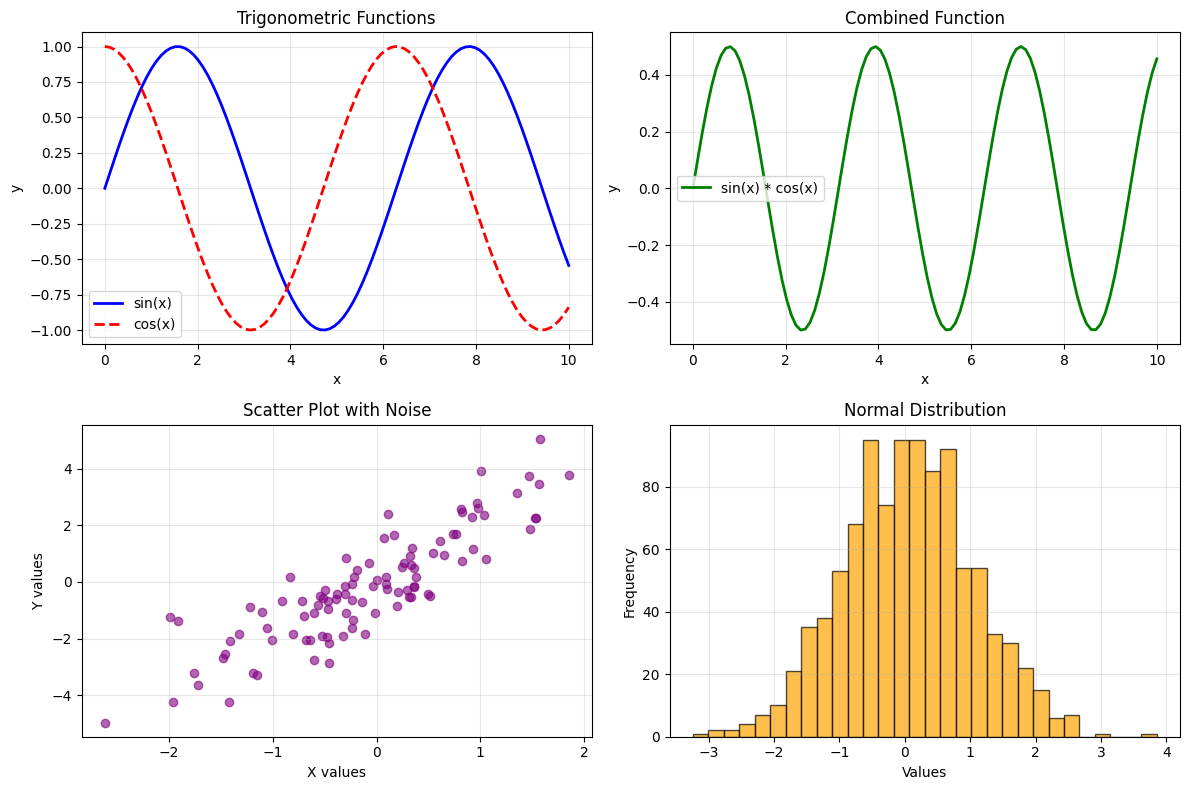

In [2]:
# Create sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.cos(x)

# Create a comprehensive plot
plt.figure(figsize=(12, 8))

# Subplot 1: Basic trigonometric functions
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'b-', label='sin(x)', linewidth=2)
plt.plot(x, y2, 'r--', label='cos(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trigonometric Functions')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Combined function
plt.subplot(2, 2, 2)
plt.plot(x, y3, 'g-', label='sin(x) * cos(x)', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Combined Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Scatter plot with noise
plt.subplot(2, 2, 3)
x_scatter = np.random.randn(100)
y_scatter = 2 * x_scatter + np.random.randn(100)
plt.scatter(x_scatter, y_scatter, alpha=0.6, c='purple')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot with Noise')
plt.grid(True, alpha=0.3)

# Subplot 4: Histogram
plt.subplot(2, 2, 4)
data = np.random.normal(0, 1, 1000)
plt.hist(data, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Normal Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Interactive Plotly Visualization

Now let's test interactive plots with Plotly:


Creating static plots with matplotlib...


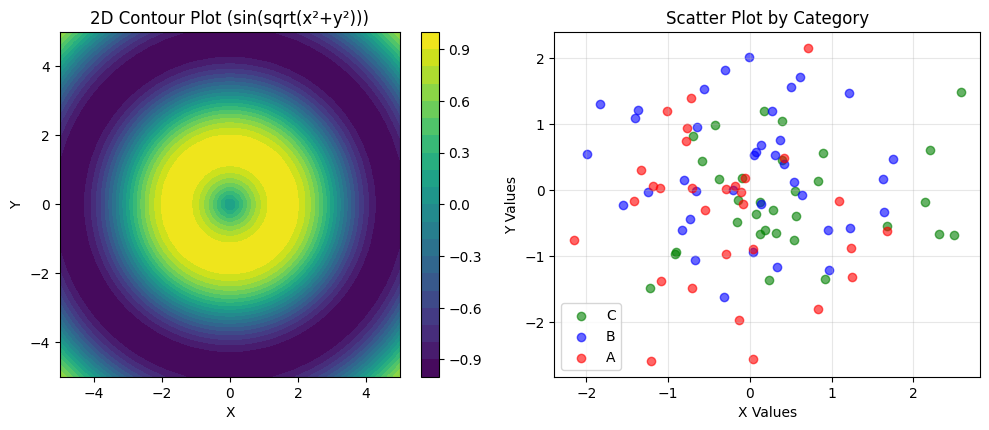


Trying Plotly with different renderers...
Current renderer: browser
Plotly plot displayed successfully!


In [3]:
# Create static matplotlib version first (more reliable)
print("Creating static plots with matplotlib...")

# Create a 2D heatmap instead of 3D surface
x_3d = np.linspace(-5, 5, 50)
y_3d = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_3d, y_3d)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.title('2D Contour Plot (sin(sqrt(x²+y²)))')
plt.xlabel('X')
plt.ylabel('Y')

# Create scatter plot with matplotlib
plt.subplot(2, 2, 2)
df = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'category': np.random.choice(['A', 'B', 'C'], 100)
})

colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
for cat in df['category'].unique():
    mask = df['category'] == cat
    plt.scatter(df[mask]['x'], df[mask]['y'], 
               c=colors[cat], label=cat, alpha=0.6)

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot by Category')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Try Plotly with different renderer
print("\nTrying Plotly with different renderers...")

# Set different renderers
pio.renderers.default = "browser"  # Try browser renderer
print(f"Current renderer: {pio.renderers.default}")

# Create simple Plotly plot
fig_simple = px.scatter(df, x='x', y='y', color='category', 
                       title='Simple Plotly Scatter Plot')
fig_simple.update_layout(width=600, height=400)

# Try to display
try:
    fig_simple.show()
    print("Plotly plot displayed successfully!")
except Exception as e:
    print(f"Plotly display error: {e}")
    print("Falling back to static matplotlib plots...")


## Data Analysis

Let's perform some data analysis to test the full functionality:


In [4]:
# Generate sample dataset
np.random.seed(123)
data = {
    'feature1': np.random.normal(100, 15, 1000),
    'feature2': np.random.normal(50, 10, 1000),
    'feature3': np.random.normal(25, 5, 1000),
    'category': np.random.choice(['Type A', 'Type B', 'Type C'], 1000)
}

df_analysis = pd.DataFrame(data)

# Basic statistics
print("Dataset Overview:")
print(f"Shape: {df_analysis.shape}")
print(f"Columns: {list(df_analysis.columns)}")
print("\nBasic Statistics:")
print(df_analysis.describe())

# Correlation analysis
print("\nCorrelation Matrix:")
correlation_matrix = df_analysis[['feature1', 'feature2', 'feature3']].corr()
print(correlation_matrix)

# Group by category
print("\nGroup Statistics by Category:")
group_stats = df_analysis.groupby('category').agg({
    'feature1': ['mean', 'std'],
    'feature2': ['mean', 'std'],
    'feature3': ['mean', 'std']
})
print(group_stats)


Dataset Overview:
Shape: (1000, 4)
Columns: ['feature1', 'feature2', 'feature3', 'category']

Basic Statistics:
          feature1     feature2     feature3
count  1000.000000  1000.000000  1000.000000
mean     99.406538    50.083892    25.051765
std      15.019325     9.584889     4.909747
min      51.534175    11.986218     9.665062
25%      89.731651    43.610755    21.780566
50%      99.382217    50.484554    25.221117
75%     110.032986    56.538834    28.235850
max     153.573688    78.507077    38.959856

Correlation Matrix:
          feature1  feature2  feature3
feature1  1.000000 -0.031283 -0.032409
feature2 -0.031283  1.000000 -0.013392
feature3 -0.032409 -0.013392  1.000000

Group Statistics by Category:
           feature1              feature2             feature3          
               mean        std       mean       std       mean       std
category                                                                
Type A    99.841366  14.007879  49.861579  9.696586  25.

## Conclusion

This notebook demonstrates that Quarto can handle `.ipynb` files directly as blog posts. The key features tested include:

- ✅ **YAML metadata** in the first cell
- ✅ **Mixed content** (markdown and code cells)
- ✅ **Python code execution** with multiple libraries
- ✅ **Static plots** with matplotlib
- ✅ **Interactive plots** with Plotly
- ✅ **Data analysis** with pandas and numpy
- ✅ **Proper formatting** and output display

This approach allows data scientists to use their existing Jupyter notebooks directly in Quarto blogs without any conversion!


=== Jupyter Notebook Test Results ===
✅ NumPy: 2.3.4
✅ Pandas: 2.3.3
✅ Matplotlib: 3.10.7
✅ Plotly: 6.3.1


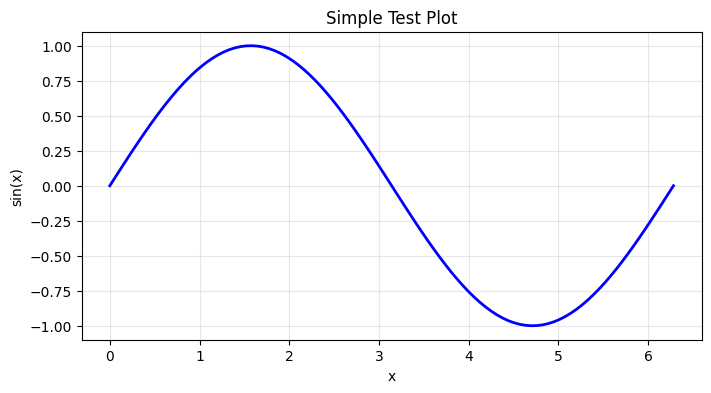

✅ Matplotlib plots working!
✅ Notebook execution successful!


In [5]:
# Test cell to verify everything is working
print("=== Jupyter Notebook Test Results ===")
print(f"✅ NumPy: {np.__version__}")
print(f"✅ Pandas: {pd.__version__}")
print(f"✅ Matplotlib: {plt.matplotlib.__version__}")
print(f"✅ Plotly: {plotly.__version__}")

# Test basic functionality
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Simple Test Plot')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True, alpha=0.3)
plt.show()

print("✅ Matplotlib plots working!")
print("✅ Notebook execution successful!")
